In [19]:
#import packages for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import packages for machine learning
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint

#import packages for data management
import joblib

In [20]:
salary_data = pd.read_csv("data/ds_salaries.csv")

In [21]:
salary_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [22]:
salary_data = salary_data[["experience_level", "employment_type", "job_title", "company_size", "salary_in_usd"]]

In [23]:
salary_data.dtypes

experience_level    object
employment_type     object
job_title           object
company_size        object
salary_in_usd        int64
dtype: object

In [24]:
salary_data.head()

,experience_level,employment_type,job_title,company_size,salary_in_usd
0,MI,FT,Data Scientist,L,79833
1,SE,FT,Machine Learning Scientist,S,260000
2,SE,FT,Big Data Engineer,M,109024
3,MI,FT,Product Data Analyst,S,20000
4,SE,FT,Machine Learning Engineer,L,150000


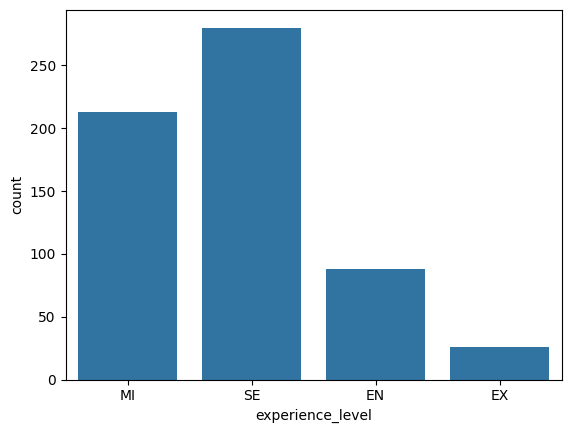

In [25]:
sns.countplot(x = "experience_level", data = salary_data)
plt.show()

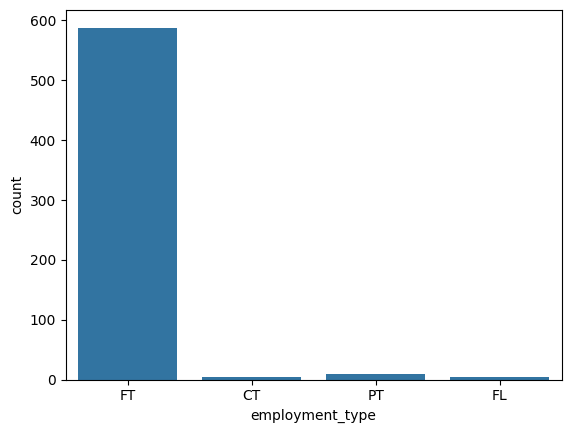

In [26]:
sns.countplot(x = "employment_type", data = salary_data)
plt.show()

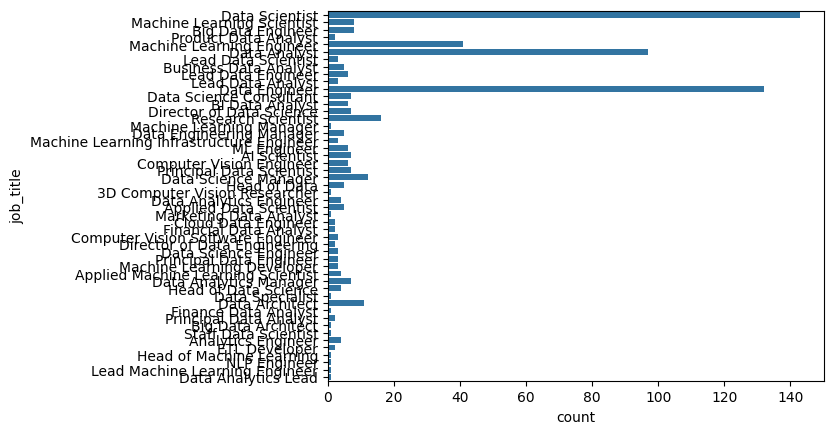

In [27]:
sns.countplot(y = "job_title", data = salary_data)
plt.show()

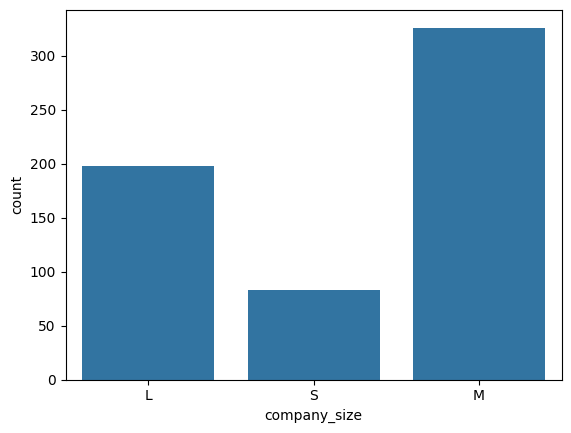

In [28]:
sns.countplot(x = "company_size", data = salary_data)
plt.show()

In [29]:
#use ordinal encoder to encode experience level
encoder = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX']])
salary_data['experience_level_encoded'] = encoder.fit_transform(salary_data[['experience_level']])

#use ordinal encoder to encode company size
encoder = OrdinalEncoder(categories=[['S', 'M', 'L']])
salary_data['company_size_encoded'] = encoder.fit_transform(salary_data[['company_size']])

#encode employmeny type and job title using dummy columns
salary_data = pd.get_dummies(salary_data, columns = ['employment_type', 'job_title'], drop_first = True, dtype = int)

#drop original columns
salary_data = salary_data.drop(columns = ['experience_level', 'company_size'])

In [30]:
#define independent and dependent features
X = salary_data.drop(columns = 'salary_in_usd')
y = salary_data['salary_in_usd']

#split between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
  X, y, random_state = 104, test_size = 0.2, shuffle = True)

#fit linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#make predictions
y_pred = regr.predict(X_test)

#print the coefficients
print("Coefficients: n", regr.coef_)

#print the MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

#print the adjusted R2 value
print("R2: %.2f" % r2_score(y_test, y_pred))

Coefficients: n [ 3.89891601e+04  7.56505500e+03 -1.22322974e+05 -8.50203748e+04
 -9.36493326e+04  6.91298217e+04  8.73283022e+04  1.50961907e+05
  1.26014074e+04  6.45029992e+04  4.66758822e+04  3.13607053e+04
  5.51927873e+04  9.11144622e+04  1.03895454e+04  1.22246852e+05
  6.12702968e+04  5.35009072e+04  1.17870513e-09  7.57553547e+04
  1.34969626e+05  7.85140631e+04  8.52152505e+04  7.20923965e+04
  3.07292322e+04  1.08017048e+05  8.04501655e+04  1.04407827e+05
  1.39407827e+05  9.01257321e+04  4.09190422e+04  1.30382719e+03
  4.28396987e+05  8.36463147e+04  7.60883159e+04 -2.05423329e+04
  5.37069072e+04  1.01410896e+05  7.26375839e+04  3.49048822e+04
  9.97540177e+04  1.32516257e+05  7.81576777e+04  7.15889706e+04
  5.65118272e+04  1.54160637e+05  2.80618272e+04 -1.45519152e-11
  6.85270972e+04  3.23695775e+05  1.37817232e+05 -1.00195776e+03
  1.04562786e+05 -3.30474926e+04]
Mean squared error: 6412074606.94
R2: 0.05


In [31]:
# Fit Random Forest model
fr = RandomForestRegressor(random_state=42)
fr.fit(X_train, y_train)

# Make predictions
y_pred = fr.predict(X_test)

# Print feature importances instead of coefficients
print("Feature importances:\n", fr.feature_importances_)

# Print the Mean Squared Error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Print the R2 value
print("R2: %.2f" % r2_score(y_test, y_pred))

Feature importances:
 [3.33280315e-01 1.20521813e-01 5.65947813e-04 9.29932360e-03
 4.75908114e-03 1.32148732e-02 1.45193880e-03 2.78985894e-02
 4.63781778e-04 2.17927187e-03 1.42599917e-03 6.17737095e-03
 3.61872762e-03 1.70650037e-03 1.99161078e-02 4.75283303e-03
 2.41399733e-02 2.45344061e-03 0.00000000e+00 9.47083183e-04
 1.75965096e-02 2.04708405e-02 1.36359375e-03 2.97211490e-03
 4.06527478e-03 2.11481117e-02 1.39545414e-02 6.44255451e-04
 2.07916513e-03 4.37439834e-03 8.23852918e-04 3.50559256e-03
 7.57610520e-02 5.26347184e-03 3.18217632e-03 4.03480736e-03
 3.03123380e-03 1.06803266e-02 1.00215088e-02 1.81945069e-03
 2.39038316e-02 7.56403057e-04 2.03308804e-02 2.47513574e-03
 3.14420079e-04 2.67699802e-02 1.04096345e-03 0.00000000e+00
 4.29303851e-04 1.01886150e-01 7.69248805e-03 3.95928621e-03
 2.42525107e-02 6.23396496e-04]
Mean squared error: 5812963328.38
R2: 0.14


In [32]:
# Fit Random Forest model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Print feature importances instead of coefficients
print("Feature importances:\n", gbr.feature_importances_)

# Print the Mean Squared Error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Print the R2 value
print("R2: %.2f" % r2_score(y_test, y_pred))

Feature importances:
 [4.45397510e-01 7.52010848e-02 4.49038881e-04 5.28072033e-03
 6.99309007e-03 1.72921410e-03 0.00000000e+00 2.84825777e-02
 1.96475978e-04 0.00000000e+00 5.76175594e-04 8.61494980e-03
 3.24414993e-04 0.00000000e+00 2.53558813e-02 5.06982289e-03
 2.65296879e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.85769649e-02 5.41728127e-03 0.00000000e+00 0.00000000e+00
 4.21395299e-03 1.76517734e-02 3.11555978e-03 0.00000000e+00
 2.35063187e-03 1.93803840e-04 1.04722987e-03 3.94776807e-03
 1.07354949e-01 0.00000000e+00 0.00000000e+00 6.22713692e-03
 6.91507252e-04 2.70850931e-03 2.55890875e-03 1.34955888e-03
 2.18727040e-02 3.90696778e-04 4.90851969e-03 0.00000000e+00
 0.00000000e+00 3.10617110e-02 1.30554479e-03 0.00000000e+00
 0.00000000e+00 1.07924465e-01 8.34548348e-03 5.38961258e-03
 1.11950817e-02 0.00000000e+00]
Mean squared error: 5721274178.98
R2: 0.16


In [33]:
# Define parameter distribution
param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 60),
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Set up KNN model
knn = KNeighborsRegressor()

# Set up random search
random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist_knn,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit to training data
random_search_knn.fit(X_train, y_train)

# Best model
best_knn = random_search_knn.best_estimator_

# Make predictions
y_pred_knn = best_knn.predict(X_test)

# Print best parameters
print("Best Parameters (KNN):\n", random_search_knn.best_params_)

# Print evaluation metrics
print("Mean squared error (KNN): %.2f" % mean_squared_error(y_test, y_pred_knn))
print("R2 (KNN): %.2f" % r2_score(y_test, y_pred_knn))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (KNN):
 {'algorithm': 'brute', 'leaf_size': 31, 'n_neighbors': 29, 'p': 2, 'weights': 'uniform'}
Mean squared error (KNN): 5161215032.01
R2 (KNN): 0.24


In [34]:
#save model using joblib
joblib.dump(best_knn, 'models/knn_regress.pkl')

['models/knn_regress.pkl']